# PST130 Genome phasing


In [126]:
%matplotlib inline

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy
from Bio import SeqIO, SeqUtils
import os
import re

In [183]:
#Define the PATH
BASE_AA_PATH = '/Users/havasquezgross/rust_project'
COV_IN_PATH = '/Users/havasquezgross/rust_project/COV'
ASSEMBLY = '/Users/havasquezgross/rust_project/assembly'
FIGURE_PATH = '/Users/havasquezgross/rust_project/figures'
COV_OUT_PATH = os.path.join(BASE_AA_PATH, 'COV_OUT')
if not os.path.isdir(COV_OUT_PATH):
    os.mkdir(COV_OUT_PATH)

In [129]:
input_genome = 'Pst130_v5'
coverage_file_suffix = '.cov.gz'
output_genome = 'Pst130_v5'


In [130]:
#get all the cov files with this coverage_file_suffix. Expacts to get all three p, h and ph mapping
cov_files = [os.path.join(COV_IN_PATH, x) for x in os.listdir(COV_IN_PATH) if x.endswith(coverage_file_suffix)]
cov_files


['/Users/havasquezgross/rust_project/COV/pst130_v5_h_ctg_illumina.sorted.bam.aall.cov.gz',
 '/Users/havasquezgross/rust_project/COV/pst130_v5_p_ctg_illumina.sorted.bam.aall.cov.gz',
 '/Users/havasquezgross/rust_project/COV/pst130_v5_pb_mapped_h.sorted.bam.aall.cov.gz',
 '/Users/havasquezgross/rust_project/COV/pst130_v5_pb_mapped_p.sorted.bam.aall.cov.gz',
 '/Users/havasquezgross/rust_project/COV/pst130_v5_pb_mapped_ph.sorted.bam.aall.cov.gz',
 '/Users/havasquezgross/rust_project/COV/pst130_v5_ph_ctg_illumina.sorted.bam.aall.cov.gz']

In [131]:
cov_header = ["contig", "position", "coverage"]
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

In [132]:

ph_cov_pb = pd.read_csv([y for y in cov_files if 'pb_mapped_ph.' in y][0], sep='\t', header=None, names=cov_header)
print('Read in following file as pb_ph_coverage produced with samtools depth -aa feature: %s' %[y for y in cov_files if 'pb_mapped_ph.' in y][0])


Read in following file as pb_ph_coverage produced with samtools depth -aa feature: /Users/havasquezgross/rust_project/COV/pst130_v5_pb_mapped_ph.sorted.bam.aall.cov.gz


The mean overall coverage is 32.07 and the std is 78.10 for PacBio ph mapping


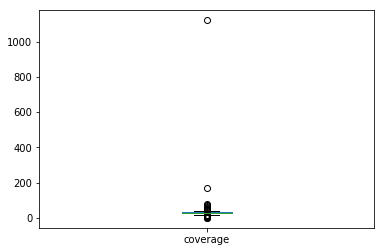

In [133]:
#summarize the mean coverage by contigs for all contigs when mapping PacBio reads against p and h contigs. Plot only coverage plot for p_contigs
mean_cov_per_contig_ph_pb = ph_cov_pb.groupby('contig').mean()
mean_cov_per_contig_ph_pb['contig'] = mean_cov_per_contig_ph_pb.index
#Find all contigs that do not contain "_" for pcontigs
mean_cov_per_contig_ph_pb[mean_cov_per_contig_ph_pb['contig'].str.contains('_')==False]['coverage'].plot.box()
overall_mean_ph_pb = ph_cov_pb['coverage'].mean()

overall_std_ph_pb = ph_cov_pb['coverage'].std()

print("The mean overall coverage is %.2f and the std is %.2f for PacBio ph mapping" % (overall_mean_ph_pb, overall_std_ph_pb))

In [171]:
p_fasta = os.path.join(ASSEMBLY, "pst130_v5_primary.fa")
h_fasta = os.path.join(ASSEMBLY, "pst130_v5_haplotig.fa")

p_lengths = list()
for pseq_record in SeqIO.parse(p_fasta, "fasta"):
    p_lengths.append((pseq_record.id, len(pseq_record.seq)))
p_lengths_df = pd.DataFrame(sorted(p_lengths), columns=['contig', 'length'])

h_lengths = list()
for hseq_record in SeqIO.parse(h_fasta, "fasta"):
    h_lengths.append((hseq_record.id, len(hseq_record.seq)))
h_lengths_df = pd.DataFrame(sorted(h_lengths), columns=['contig', 'length'])

regex_pat = re.compile(r'_\d+')
h_lengths_df['pcontig'] = h_lengths_df['contig'].str.replace(regex_pat, '', regex=True) #this is a bit of a hack as the pcontigs are also

p_contigs_init = list(p_lengths_df.contig.unique())
p_contig_count = len(p_lengths_df.index)
h_contig_count = len(h_lengths_df.index)
print("Initially, there are %d p contigs and %d h contigs" % (p_contig_count, h_contig_count))


Initially, there are 154 p contigs and 468 h contigs


In [135]:
pwh_df = p_lengths_df[p_lengths_df['contig'].isin(h_lengths_df['pcontig'])]
pwoh_df = p_lengths_df[~p_lengths_df['contig'].isin(h_lengths_df['pcontig'])]
pwoh_df
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(pwoh_df)

,contig,length
24,000024F,66107
49,000052F,526246
50,000053F,483229
56,000059F,403878
57,000060F,47397
63,000067F,281241
64,000068F,282407
65,000069F,278464
66,000070F,265832
67,000072F,245983


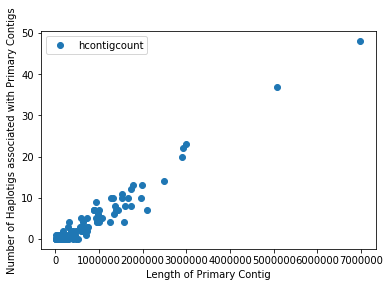

In [185]:
#p_lengths_df
hcount = []
for contig in p_lengths_df['contig']:
    count = 0
    for pcontig in h_lengths_df['pcontig']:
        if pcontig == contig:
            count += 1
    hcount.append(count)
    #print contig, count
p_lengths_df['hcontigcount'] = hcount

#p_lengths_df['hcontigcount'].plot.box()
p_lengths_df.plot(x='length', y='hcontigcount', style='o')
plt.ylabel("Number of Haplotigs associated with Primary Contigs")
plt.xlabel("Length of Primary Contig")
fig_name = "hcontigcount_by_plength.png"
plt.savefig(os.path.join(FIGURE_PATH, fig_name), bbox_inches='tight')

In [136]:
##Fix names
regex_pat = re.compile(r'\|quiver.+')
mean_cov_per_contig_ph_pb['contig'] = mean_cov_per_contig_ph_pb['contig'].str.replace(regex_pat, '', regex=True)

##Add orphan classification
row_indexes=mean_cov_per_contig_ph_pb[mean_cov_per_contig_ph_pb['contig'].isin(pwoh_df['contig'])].index
mean_cov_per_contig_ph_pb.loc[row_indexes,'orphan']="yes"

##Merge the lengths DF
combined_lengths = pd.concat([p_lengths_df, h_lengths_df], sort=False)

#add contig lengths
mean_cov_per_contig_ph_pb_withlength = pd.merge(mean_cov_per_contig_ph_pb, combined_lengths, how='left', on='contig')
mean_cov_per_contig_ph_pb_withlength['product'] = mean_cov_per_contig_ph_pb_withlength['coverage'] * mean_cov_per_contig_ph_pb_withlength['length']
mean_cov_per_contig_ph_pb_withlength.to_csv(os.path.join(COV_OUT_PATH, output_genome + '_mean_cov_per_contig_ph_pb_withlength.tsv'), index = None, sep ='\t')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mean_cov_per_contig_ph_pb_withlength)

,position,coverage,contig,orphan,length,pcontig,product
0,20295.5,10.542498,000000F_001,NaN,40590,000000F,427920.0
1,156060.0,26.223136,000000F_004,NaN,312119,000000F,8184739.0
2,117513.5,28.711679,000000F_005,NaN,235026,000000F,6747991.0
3,43130.0,23.219826,000000F_006,NaN,86259,000000F,2002919.0
4,183732.5,30.988902,000000F_007,NaN,367464,000000F,11387306.0
5,176032.0,30.089066,000000F_008,NaN,352063,000000F,10593247.0
6,114756.0,27.517383,000000F_009,NaN,229511,000000F,6315542.0
7,50480.5,31.433112,000000F_010,NaN,100960,000000F,3173487.0
8,78508.0,25.044722,000000F_011,NaN,157015,000000F,3932397.0
9,175752.5,28.736902,000000F_013,NaN,351504,000000F,10101136.0


In [137]:
#Look at coverages greater than 150
phcontig_pb_greater_150 = mean_cov_per_contig_ph_pb_withlength[mean_cov_per_contig_ph_pb_withlength['coverage'] > 150]
print("There are %d contigs greater than 150 coverage with PacBio Reads" % (len(phcontig_pb_greater_150.index)))
phcontig_pb_greater_150


There are 11 contigs greater than 150 coverage with PacBio Reads


,position,coverage,contig,orphan,length,pcontig,product
451,36660.5,307.701909,000045F_001,NaN,73320,000045F,22560704.0
552,26403.0,1202.866433,000111F_001,NaN,52805,000111F,63517362.0
553,16702.5,947.859268,000111F_002,NaN,33404,000111F,31662291.0
555,39423.5,1058.959998,000111F_004,NaN,78846,000111F,83494760.0
557,21067.0,736.294306,000111F_006,NaN,42133,000111F,31022288.0
558,36534.0,2018.179849,000111F_008,NaN,73067,000111F,147462347.0
581,22032.0,1520.468102,000135F_001,NaN,44063,000135F,66996386.0
582,35960.5,167.982453,000135F,NaN,71920,NaN,12081298.0
611,12466.0,1120.900766,000183F,yes,24931,NaN,27945177.0
616,12656.0,271.017147,000210F_001,NaN,25311,000210F,6859715.0


In [138]:
##After blasting the above, (and associated hpalotigs), set the types
##Added 111F_003, 111F_005, 111F_
mito_list = ['000111F_001', '000111F_002', '000111F_003', '000111F_004', '000111F_005','000111F_006' \
'000111F_008', '000183F', '000210F_001', '000211F', '000211F_001']
ribo_list = ['000135F', '000135F_001', '000045F_001']

##Set mito
row_indexes=mean_cov_per_contig_ph_pb_withlength[mean_cov_per_contig_ph_pb_withlength['contig'].isin(mito_list)].index
mean_cov_per_contig_ph_pb_withlength.loc[row_indexes,'genometype']="mito"

##Set ribo
row_indexes=mean_cov_per_contig_ph_pb_withlength[mean_cov_per_contig_ph_pb_withlength['contig'].isin(ribo_list)].index
mean_cov_per_contig_ph_pb_withlength.loc[row_indexes,'genometype']="ribo"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mean_cov_per_contig_ph_pb_withlength)

,position,coverage,contig,orphan,length,pcontig,product,genometype
0,20295.5,10.542498,000000F_001,NaN,40590,000000F,427920.0,NaN
1,156060.0,26.223136,000000F_004,NaN,312119,000000F,8184739.0,NaN
2,117513.5,28.711679,000000F_005,NaN,235026,000000F,6747991.0,NaN
3,43130.0,23.219826,000000F_006,NaN,86259,000000F,2002919.0,NaN
4,183732.5,30.988902,000000F_007,NaN,367464,000000F,11387306.0,NaN
5,176032.0,30.089066,000000F_008,NaN,352063,000000F,10593247.0,NaN
6,114756.0,27.517383,000000F_009,NaN,229511,000000F,6315542.0,NaN
7,50480.5,31.433112,000000F_010,NaN,100960,000000F,3173487.0,NaN
8,78508.0,25.044722,000000F_011,NaN,157015,000000F,3932397.0,NaN
9,175752.5,28.736902,000000F_013,NaN,351504,000000F,10101136.0,NaN


In [139]:
phcontig_pb_greater_150 = mean_cov_per_contig_ph_pb_withlength[(mean_cov_per_contig_ph_pb_withlength['coverage'] > 150) & (mean_cov_per_contig_ph_pb_withlength['genometype'] != 'ribo')]
print("There are %d contigs greater than 150 coverage and not Ribo with PacBio Reads" % (len(phcontig_pb_greater_150.index)))
phcontig_pb_greater_150

phcontig_pb_smaller_150 = mean_cov_per_contig_ph_pb_withlength[~mean_cov_per_contig_ph_pb_withlength['contig'].isin(phcontig_pb_greater_150['contig'])]
phcontig_pb_smaller_150

There are 8 contigs greater than 150 coverage and not Ribo with PacBio Reads


,position,coverage,contig,orphan,length,pcontig,product,genometype
0,20295.5,10.542498,000000F_001,NaN,40590,000000F,427920.0,NaN
1,156060.0,26.223136,000000F_004,NaN,312119,000000F,8184739.0,NaN
2,117513.5,28.711679,000000F_005,NaN,235026,000000F,6747991.0,NaN
3,43130.0,23.219826,000000F_006,NaN,86259,000000F,2002919.0,NaN
4,183732.5,30.988902,000000F_007,NaN,367464,000000F,11387306.0,NaN
5,176032.0,30.089066,000000F_008,NaN,352063,000000F,10593247.0,NaN
6,114756.0,27.517383,000000F_009,NaN,229511,000000F,6315542.0,NaN
7,50480.5,31.433112,000000F_010,NaN,100960,000000F,3173487.0,NaN
8,78508.0,25.044722,000000F_011,NaN,157015,000000F,3932397.0,NaN
9,175752.5,28.736902,000000F_013,NaN,351504,000000F,10101136.0,NaN


In [140]:
##Find orphan primary coverage
phcontig_pb_orphans_smaller_150 = phcontig_pb_smaller_150[(phcontig_pb_smaller_150['orphan'] == 'yes') & (phcontig_pb_smaller_150['genometype'] != "mito")]
orphans_length_pb = phcontig_pb_orphans_smaller_150['length'].sum()
orphans_coverage_pb = phcontig_pb_orphans_smaller_150['product'].sum() / orphans_length_pb
print("The coverage of %d orphan contigs is %.2f at %d bp" % (len(phcontig_pb_orphans_smaller_150.index), orphans_coverage_pb, orphans_length_pb))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(phcontig_pb_orphans_smaller_150.sort_values(by='coverage', ascending=False))

The coverage of 83 orphan contigs is 28.68 at 9581359 bp


,position,coverage,contig,orphan,length,pcontig,product,genometype
596,25984.5,78.173183,000153F,yes,51968,NaN,4062504.0,NaN
594,26298.0,72.607187,000150F,yes,52595,NaN,3818775.0,NaN
619,11404.0,69.002850,000214F,yes,22807,NaN,1573748.0,NaN
578,37631.0,63.470562,000131F,yes,75261,NaN,4776858.0,NaN
608,20322.0,50.279753,000173F,yes,40643,NaN,2043520.0,NaN
587,32166.5,49.253808,000141F,yes,64332,NaN,3168596.0,NaN
571,40015.0,45.929651,000124F,yes,80029,NaN,3675704.0,NaN
586,32065.5,45.340356,000140F,yes,64130,NaN,2907677.0,NaN
610,17688.0,37.921611,000180F,yes,35375,NaN,1341477.0,NaN
576,38333.0,36.460758,000128F,yes,76665,NaN,2795264.0,NaN


In [156]:
##Blast the top 5; 000214F looks like mitochondrial
mito_list.append('000214F')
##Assign to dataframes
row_indexes=phcontig_pb_orphans_smaller_150[phcontig_pb_orphans_smaller_150['contig'].isin(mito_list)].index
phcontig_pb_orphans_smaller_150.loc[row_indexes,'genometype']="mito"
row_indexes=mean_cov_per_contig_ph_pb_withlength[mean_cov_per_contig_ph_pb_withlength['contig'].isin(mito_list)].index
mean_cov_per_contig_ph_pb_withlength.loc[row_indexes,'genometype']="mito"


##Now refilter and recalculate
phcontig_pb_orphans_smaller_150 = phcontig_pb_orphans_smaller_150[phcontig_pb_orphans_smaller_150['genometype'] != "mito"]
orphans_length_pb = phcontig_pb_orphans_smaller_150['length'].sum()
orphans_product_pb = phcontig_pb_orphans_smaller_150['product'].sum()
orphans_coverage_pb = orphans_product_pb / orphans_length_pb
orphans_count_pb = len(phcontig_pb_orphans_smaller_150.index)
print("The coverage of %d orphan contigs is %.2f at %d bp" % (orphans_count_pb, orphans_coverage_pb, orphans_length_pb))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(phcontig_pb_orphans_smaller_150.sort_values(by='coverage', ascending=False))


The coverage of 82 orphan contigs is 28.58 at 9558552 bp


,position,coverage,contig,orphan,length,pcontig,product,genometype
596,25984.5,78.173183,000153F,yes,51968,NaN,4062504.0,NaN
594,26298.0,72.607187,000150F,yes,52595,NaN,3818775.0,NaN
578,37631.0,63.470562,000131F,yes,75261,NaN,4776858.0,NaN
608,20322.0,50.279753,000173F,yes,40643,NaN,2043520.0,NaN
587,32166.5,49.253808,000141F,yes,64332,NaN,3168596.0,NaN
571,40015.0,45.929651,000124F,yes,80029,NaN,3675704.0,NaN
586,32065.5,45.340356,000140F,yes,64130,NaN,2907677.0,NaN
610,17688.0,37.921611,000180F,yes,35375,NaN,1341477.0,NaN
576,38333.0,36.460758,000128F,yes,76665,NaN,2795264.0,NaN
525,80299.0,35.924276,000086F,yes,160597,NaN,5769331.0,NaN


In [144]:
##Need to remove ribo on my
notorphans_phcontigs = phcontig_pb_smaller_150[~phcontig_pb_smaller_150['contig'].isin(phcontig_pb_orphans_smaller_150['contig'])]
notorphans_hcontigs = notorphans_phcontigs[notorphans_phcontigs['contig'].str.contains("_")]
notorphans_hcontigs = notorphans_hcontigs[(phcontig_pb_smaller_150['genometype'] != "mito") & (phcontig_pb_smaller_150['genometype'] != "ribo")]
h_length_pb = notorphans_hcontigs['length'].sum()
h_product_pb = notorphans_hcontigs['product'].sum()
h_coverage_pb =  h_product_pb / h_length_pb
h_count_pb = len(notorphans_hcontigs.index)
print("The coverage of %d haplotig contigs is %.2f at %d bp" % (h_count_pb, h_coverage_pb, h_length_pb))
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(notorphans_hcontigs.sort_values(by='coverage', ascending=False))
    #display(notorphans_hcontigs)
    


The coverage of 457 haplotig contigs is 26.27 at 65770377 bp


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [146]:

##Blast top 5 coverages, 000198F_001 Looks like ribosomal
ribo_list.append('000198F_001')
row_indexes=notorphans_hcontigs[notorphans_hcontigs['contig'].isin(ribo_list)].index
notorphans_hcontigs.loc[row_indexes,'genometype']="ribo"
row_indexes=mean_cov_per_contig_ph_pb_withlength[mean_cov_per_contig_ph_pb_withlength['contig'].isin(ribo_list)].index
mean_cov_per_contig_ph_pb_withlength.loc[row_indexes,'genometype']="ribo"
row_indexes=phcontig_pb_smaller_150[phcontig_pb_smaller_150['contig'].isin(ribo_list)].index
phcontig_pb_smaller_150.loc[row_indexes,'genometype']="ribo"

##Redo haplotig count
##Need to remove ribo on my
notorphans_phcontigs = phcontig_pb_smaller_150[~phcontig_pb_smaller_150['contig'].isin(phcontig_pb_orphans_smaller_150['contig'])]
notorphans_hcontigs = notorphans_phcontigs[notorphans_phcontigs['contig'].str.contains("_")]
notorphans_hcontigs = notorphans_hcontigs[(phcontig_pb_smaller_150['genometype'] != "mito") & (phcontig_pb_smaller_150['genometype'] != "ribo")]
h_length_pb = notorphans_hcontigs['length'].sum()
h_product_pb = notorphans_hcontigs['product'].sum()
h_coverage_pb =  h_product_pb / h_length_pb
h_count_pb = len(notorphans_hcontigs.index)
print("The coverage of %d haplotig contigs is %.2f at %d bp" % (h_count_pb, h_coverage_pb, h_length_pb))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(notorphans_hcontigs.sort_values(by='coverage', ascending=False))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


The coverage of 456 haplotig contigs is 26.27 at 65762716 bp


,position,coverage,contig,orphan,length,pcontig,product,genometype
548,19382.5,54.257584,000108F_001,NaN,38764,000108F,2103241.0,NaN
612,12478.0,48.487477,000190F_001,NaN,24955,000190F,1210005.0,NaN
313,11245.5,47.665985,000020F_003,NaN,22490,000020F,1072008.0,NaN
472,12004.5,42.513829,000051F_002,NaN,24008,000051F,1020672.0,NaN
44,6764.0,38.586752,000000F_054,NaN,13527,000000F,521963.0,NaN
332,21159.0,37.785713,000021F_011,NaN,42317,000021F,1598978.0,NaN
428,64245.5,36.934080,000037F_003,NaN,128490,000037F,4745660.0,NaN
293,113949.0,35.727548,000017F_012,NaN,227897,000017F,8142201.0,NaN
493,94308.5,35.675643,000062F_002,NaN,188616,000062F,6728997.0,NaN
58,70417.0,35.398657,000001F_014,NaN,140833,000001F,4985299.0,NaN


In [148]:
notorphans_pcontigs = notorphans_phcontigs[~notorphans_phcontigs['contig'].isin(notorphans_hcontigs['contig'])]
row_indexes=notorphans_pcontigs[notorphans_pcontigs['contig'].isin(mito_list)].index
notorphans_pcontigs.loc[row_indexes,'genometype']="mito"
notorphans_pcontigs = notorphans_pcontigs[(notorphans_pcontigs['genometype'] != "mito") & (notorphans_pcontigs['genometype'] != "ribo")]
p_length_pb = notorphans_pcontigs['length'].sum()
p_product_pb = notorphans_pcontigs['product'].sum()
p_coverage_pb = p_product_pb / p_length_pb
p_count_pb = len(notorphans_pcontigs.index)
print("The coverage of %d primary contigs is %.2f at %d bp without mitochondrial" % (p_count_pb, p_coverage_pb, p_length_pb))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(notorphans_pcontigs)

The coverage of 68 primary contigs is 31.04 at 75772254 bp without mitochondrial


,position,coverage,contig,orphan,length,pcontig,product,genometype
48,3492682.0,31.593368,000000F,NaN,6985363,NaN,220691142.0,NaN
86,2535670.0,34.751128,000001F,NaN,5071339,NaN,176234753.0,NaN
107,1447600.5,30.806254,000002F,NaN,2895200,NaN,89190266.0,NaN
131,1497140.0,31.054747,000003F,NaN,2994279,NaN,92986578.0,NaN
154,1459904.0,34.192774,000004F,NaN,2919807,NaN,99836300.0,NaN
169,1242017.5,29.565151,000005F,NaN,2484034,NaN,73440841.0,NaN
177,1053453.0,31.575797,000006F,NaN,2106905,NaN,66527204.0,NaN
188,979806.5,30.116926,000007F,NaN,1959612,NaN,59017490.0,NaN
202,993659.0,33.574199,000008F,NaN,1987317,NaN,66722576.0,NaN
213,827050.0,30.705885,000009F,NaN,1654099,NaN,50790574.0,NaN


In [149]:
#Check List of Contigs excluded from original
#pcontigs_final = numpy.concatenate(notorphans_pcontigs.contig.unique(), phcontig_pb_orphans_smaller_150.contig.unique())
pcontigs_final = list(notorphans_pcontigs.contig.unique())
ocontigs_final = list(phcontig_pb_orphans_smaller_150.contig.unique())
pocontigs_final = pcontigs_final + ocontigs_final
#pocontigs_final
print("There are %d po contigs after filtering out mitochondrial" % (len(pocontigs_final)))
mito_contigs_removed = Diff(p_contigs_init, pocontigs_final)
print("There are %d po contigs filtered out because of mitochondrial or ribo BLAST hit" % (len(mito_contigs_removed)))
mito_contigs_removed

There are 150 po contigs after filtering out mitochondrial
There are 4 po contigs filtered out because of mitochondrial BLAST hit


['000214F', '000211F', '000135F', '000183F']

In [150]:
ph_length_pb = p_length_pb + h_length_pb
ph_product_pb = p_product_pb + h_product_pb
ph_coverage_pb = ph_product_pb / ph_length_pb
ph_count_pb = p_count_pb + h_count_pb
print("The coverage of the %d p+h contigs without orphans is %.2f at %d bp" % (ph_count_pb, ph_coverage_pb, ph_length_pb))


The coverage of the 524 p+h contigs without orphans is 28.82 at 141534970 bp


In [151]:
po_length_pb = p_length_pb + orphans_length_pb
po_product_pb = p_product_pb + orphans_product_pb
po_coverage_pb = po_product_pb / po_length_pb
po_count_pb = p_count_pb + orphans_count_pb
print("The coverage of the %d p+o contigs is %.2f at %d bp" % (po_count_pb, po_coverage_pb, po_length_pb))

The coverage of the 150 p+o contigs is 30.76 at 85330806 bp


In [152]:
pho_length_pb = ph_length_pb + orphans_length_pb
pho_product_pb = ph_product_pb + orphans_product_pb
pho_coverage_pb = pho_product_pb / pho_length_pb
pho_count_pb = ph_count_pb + orphans_count_pb
print("The coverage of the %d p+h+o contigs without mitochondrial is %.2f at %d bp" % (pho_count_pb, pho_coverage_pb, pho_length_pb))



The coverage of the 606 p+h+o contigs without mitochondrial is 28.81 at 151093522 bp


In [154]:
##Identify possible collapsed orphans
collapsed_orphans = phcontig_pb_orphans_smaller_150[phcontig_pb_orphans_smaller_150['coverage'] > 2*orphans_coverage_pb]
collapsed_orphans_length_pb = collapsed_orphans['length'].sum()
collapsed_orphans_coverage_pb = collapsed_orphans['product'].sum() / collapsed_orphans_length_pb
collapsed_orphans['copy_number'] = collapsed_orphans['coverage'] / ph_coverage_pb
collapsed_orphans['estimated_length'] = collapsed_orphans['copy_number'] * collapsed_orphans['length']
collapsed_orphans_estimated_length = collapsed_orphans['estimated_length'].sum()

orphans_length_wo_collapsed_pb = orphans_length_pb - collapsed_orphans_length_pb
prcnt_collapsed = (float(collapsed_orphans_length_pb) / adjusted_orphans_length_pb) * 100
print("The coverage of %d collapsed orphan contigs is %.2f at %d bp; adjusted length of orphans without collapsed contigs at %d bp" % (len(collapsed_orphans.index), collapsed_orphans_coverage_pb, collapsed_orphans_length_pb, orphans_length_wo_collapsed_pb))
print("This is %.2f percent of the orphan by length" % (prcnt_collapsed))
print("The estimate length of the collapsed orphans when accounting for copynumber is %.2f bp. When adding this to the orphan length %d, we get the total size of orphans as %.2f" % (collapsed_orphans_estimated_length, orphans_length_wo_collapsed_pb, collapsed_orphans_estimated_length + orphans_length_wo_collapsed_pb))
collapsed_orphans_add = collapsed_orphans_estimated_length - collapsed_orphans_length_pb
print("To adjust the genome size for collapsed orphans, add %.2f bp to the primary contigs (p+o %d) for a total value of %.2f" % (collapsed_orphans_add, po_length_pb, collapsed_orphans_add + po_length_pb))
collapsed_orphans

The coverage of 3 collapsed orphan contigs is 70.39 at 179824 bp; adjusted length of orphans without collapsed contigs at 9378728 bp
This is 1.92 percent of the orphan by length
The estimate length of the collapsed orphans when accounting for copynumber is 439161.40 bp. When adding this to the orphan length 9378728, we get the total size of orphans as 9817889.40
To adjust the genome size for collapsed orphans, add 259337.40 bp to the primary contigs (p+o 85330806) for a total value of 85590143.40


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,position,coverage,contig,orphan,length,pcontig,product,genometype,copy_number,estimated_length
578,37631.0,63.470562,000131F,yes,75261,NaN,4776858.0,NaN,2.202048,165728.310935
594,26298.0,72.607187,000150F,yes,52595,NaN,3818775.0,NaN,2.519034,132488.579437
596,25984.5,78.173183,000153F,yes,51968,NaN,4062504.0,NaN,2.712140,140944.513336


In [155]:
ribo_df = mean_cov_per_contig_ph_pb_withlength[mean_cov_per_contig_ph_pb_withlength['genometype'] == 'ribo']
ribo_df['copy_number'] = ribo_df['coverage'] / ph_coverage_pb
ribo_df['estimated_length'] = ribo_df['copy_number'] * ribo_df['length']
ribo_copy_number = ribo_df['copy_number'].sum()
ribo_estimated_length = ribo_df['estimated_length'].sum()
ribo_length = ribo_df['length'].sum()
adjusted_copy_number_length_add = ribo_estimated_length - ribo_length
print("The total copy number for %d ribosomal contigs is %.2f with a length of %d and estimated copy number length of %.2f bp." % (len(ribo_df.index), ribo_copy_number, ribo_length, ribo_estimated_length))
print("To account for this increase in size due to copy number, add %.2f to the p+h assembly." % (adjusted_copy_number_length_add))
ribo_df


The total copy number for 4 ribosomal contigs is 70.88 with a length of 196964 and estimated copy number length of 3538702.99 bp.
To account for this increase in size due to copy number, add 3341738.99 to the p+h assembly.


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,position,coverage,contig,orphan,length,pcontig,product,genometype,copy_number,estimated_length
451,36660.5,307.701909,000045F_001,NaN,73320,000045F,22560704.0,ribo,10.675410,7.827211e+05
581,22032.0,1520.468102,000135F_001,NaN,44063,000135F,66996386.0,ribo,52.751120,2.324373e+06
582,35960.5,167.982453,000135F,NaN,71920,NaN,12081298.0,ribo,5.827983,4.191486e+05
614,3831.0,46.881869,000198F_001,NaN,7661,000198F,359162.0,ribo,1.626520,1.246077e+04


In [121]:
adjusted_copynumber_length = po_length_pb + h_length_pb + adjusted_copy_number_length_add
print("When adding the p+o length %d with the h length %d and the adjusted copy number length for ribo %.1f, the length is %.1f bp." % (po_length_pb, h_length_pb, adjusted_copy_number_length_add, adjusted_copynumber_length))
print("The haploid length is %.1f" % (adjusted_copynumber_length / 2))

When adding the p+o length 85402726 with the h length 65887760 and the adjusted copy number length for ribo 3260225.8, the length is 154550711.8 bp.
The haploid length is 77275355.9
